[nltk_data] Downloading package punkt to /home/gitpod/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package reuters to /home/gitpod/nltk_data...
[nltk_data]   Package reuters is already up-to-date!


documents with at least one topic =  512
max number of topics in one document =  16
topics =  73
places =  75
organizations =  9


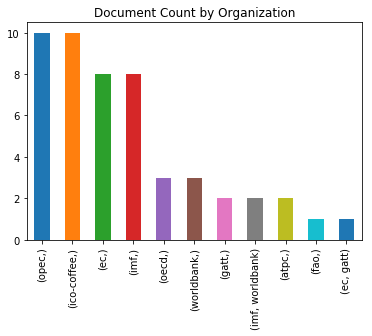

In [22]:
import matplotlib as plt
import re
import nltk 
import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem .porter import PorterStemmer
from sklearn.preprocessing.label import MultiLabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import reuters

nltk.download("punkt")
nltk.download("stopwords", "data")
nltk.download("reuters")

nltk.data.path.append("data")


def getData():
    filelist = ['reuters-000.json',
            'reuters-001.json',
            'reuters-002.json',
            'reuters-003.json',
            'reuters-004.json',
            'reuters-005.json',
            'reuters-006.json',
            'reuters-007.json',
            'reuters-008.json',
            'reuters-009.json',
            'reuters-010.json',
            'reuters-011.json',
            'reuters-012.json',
            'reuters-013.json',
            'reuters-014.json',
            'reuters-015.json',
            'reuters-016.json',
            'reuters-017.json',
            'reuters-018.json',
            'reuters-019.json',
            'reuters-020.json',
            'reuters-021.json']

    data_set = pd.DataFrame()

    for fname in filelist:
        df = pd.read_json('../../../test_data/nlp/reuters-21578-json/'+fname).T
        data_set = data_set.append(df)

        data_set = data_set.fillna("")

        #Extracting metadata and the text body from each document in the corpus.

        topics = set([x for sublist in data_set[u'topics'].values.tolist() for x in sublist])
        places = set([x for sublist in data_set[u'places'].values.tolist() for x in sublist])
        orgs = set([x for sublist in data_set[u'organisations'].values.tolist() for x in sublist])
     #   print("df topics: ", data_set[u'topics'])

        data_set["topic_count"] = data_set[u'topics'].apply(lambda x:len(x))
        
        #line below is book version, i use the above since they look the same
        #data_set["topic_count"] = data_set[u'topics'].apply(lambda x:len([y for y in x]))
        
        

      #  print("df topic_count: ", data_set["topic_count"])

        print("documents with at least one topic = ",len(data_set[data_set[u'topic_count']>0]))
        print("max number of topics in one document = ",data_set[u'topic_count'].max())
        print('topics = ',len(topics))
        print('places = ',len(places))
        print('organizations = ',len(orgs))

#        data_set[u'organisations'].apply(tuple).value_counts()[1:15].plot(kind='bar',title="Document Count by Organization")

  #      data_set[u'places'].apply(tuple).value_counts()[2:15].sort_values().plot(kind='barh',title='Document Count by Places outside US')

#        data_set[u'topics'].apply(tuple).value_counts()[1:15].sort_values().plot(kind='barh',title='Document Count by Topic')
        return data_set

#Creating a tokenizer

labelBinarizer = MultiLabelBinarizer()
#data_set= reuters.fileids()
data_set=  getData()



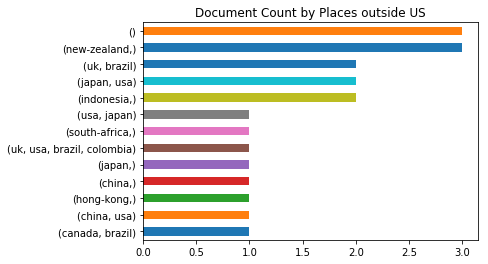

In [17]:
data_set[u'places'].apply(tuple).value_counts()[2:15].sort_values().plot(kind='barh',title='Document Count by Places outside US')


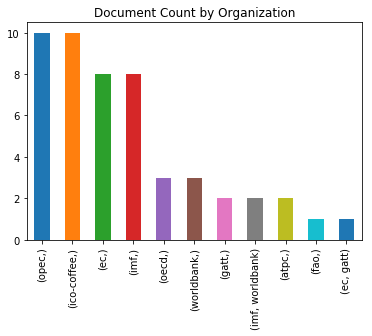

In [20]:
data_set[u'organisations'].apply(tuple).value_counts()[1:15].plot(kind='bar',title="Document Count by Organization")


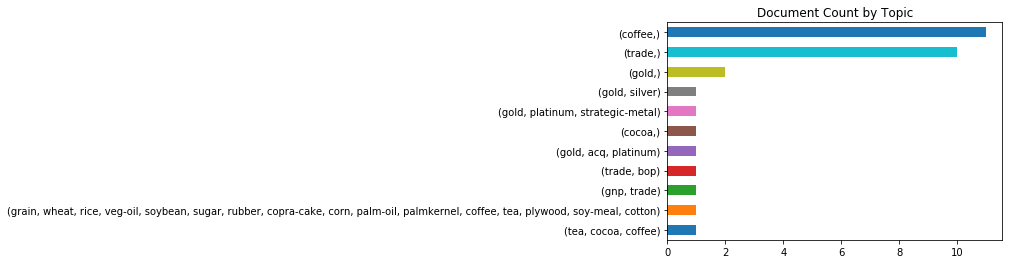

In [16]:
data_set[u'topics'].apply(tuple).value_counts()[1:15].sort_values().plot(kind='barh',title='Document Count by Topic')


In [23]:
data_target = labelBinarizer.fit_transform(data_set[u'topics'])
stopWords = stopwords.words("english")
charfilter = re.compile("[a-zA-Z]+")


def simpleTokenizer(text):
	words = map(lambda word : word.lower(), word_tokenize(text))
	words = [word for word in words if word not in stopWords]
	tokens = (list(map(lambda token: PorterStemmer().stem(token),words)))
	ntokens = list(filter(lambda token: charfilter.match(token),tokens))
	return ntokens

vec = TfidfVectorizer(tokenizer=simpleTokenizer,max_features=1000,norm="l2")

mytopics = [u'cocoa',u'trade',u'money-supply',u'coffee', u'gold'] 
data_set = data_set[data_set[u'topics'].map(set(mytopics).intersection).apply(lambda x : len(x)>0)]

docs = list(data_set[u'body'].values)
dtm= vec.fit_transform(docs)